In [2]:
from warnings import simplefilter
from sklearn.decomposition import PCA
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Genotyped.csv", index_col='index')
data

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408290,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443
index,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,0,0,0,0,1
1,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
2,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
3,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,1,0,1,0
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,1,1,1,1,1,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,1
595,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,0,0,0,1,0,1
596,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,1,1


In [4]:
output = pd.read_csv("Phenotypes.csv", index_col="index")
output

,V1,V2,V3,V4,average phenotypes
index,,,,,
0,1.671629,-1.727470,-1.890285,0.050916,-0.648708
1,-0.252703,0.409522,0.309386,-1.738759,0.155402
2,0.341815,-0.648626,-0.799559,-1.053569,-0.368790
3,0.785439,0.093949,0.570468,0.551757,0.483285
4,0.998318,-0.282481,1.618682,-0.114285,0.778173
...,...,...,...,...,...
594,-1.248504,1.419042,1.574549,1.659656,0.581695
595,-1.052126,0.082785,2.138355,0.554385,0.389671
596,-1.209974,0.451963,2.022570,1.848717,0.421519


In [5]:
X = data
y = output.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

split = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

In [7]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=2, random_state=0).fit(X)

In [8]:
X_one = X[clustering.labels_ == 0]
y_one = y[clustering.labels_ == 0]

X_two = X[clustering.labels_ == 1]
y_two = y[clustering.labels_ == 1]

In [9]:
clustering_one = KMeans(n_clusters=2, random_state=0).fit(X_one)
clustering_two = KMeans(n_clusters=2, random_state=0).fit(X_two)

In [10]:
X_one_one = X_one[clustering_one.labels_ == 0]
y_one_one = y_one[clustering_one.labels_ == 0]

X_two_one = X_one[clustering_one.labels_ == 0]
y_two_one = y_one[clustering_one.labels_ == 0]

X_one_two = X_two[clustering_two.labels_ == 1]
y_one_two = y_two[clustering_two.labels_ == 1]

X_two_two = X_two[clustering_two.labels_ == 1]
y_two_two = y_two[clustering_two.labels_ == 1]

### Splitting the data

In [11]:
X_one_one_train, X_one_one_test, y_one_one_train, y_one_one_test = train_test_split(X_one_one, y_one_one, test_size=split, random_state=42)
X_one_two_train, X_one_two_test, y_one_two_train, y_one_two_test = train_test_split(X_one_two, y_one_two, test_size=split, random_state=42)

X_two_one_train, X_two_one_test, y_two_one_train, y_two_one_test = train_test_split(X_two_one, y_two_one, test_size=split, random_state=42)
X_two_two_train, X_two_two_test, y_two_two_train, y_two_two_test = train_test_split(X_two_two, y_two_two, test_size=split, random_state=42)

## Training the model

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
classifier = XGBRegressor(objective ='reg:squarederror')

In [14]:
grid = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "gamma": [0.0, 0.1, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
    'n_estimators': [200, 300, 400, 500]
}

In [15]:
gd_sr = GridSearchCV(estimator=classifier,
                       n_jobs=-1,
                       param_grid=grid,
                       scoring='r2',
                       cv=5, iid=False)

### Cloud 1

#### Group 1

In [16]:
gd_sr.fit(X_one_one_train, y_one_one_train)

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='r2')

In [17]:
best_parameters_one_one = gd_sr.best_params_
best_parameters_one_one

{'colsample_bytree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.25,
 'max_depth': 4,
 'n_estimators': 200}

In [21]:
best_clf_one_one = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters_one_one['n_estimators'], 
                        max_depth=best_parameters_one_one['max_depth'], 
                        learning_rate=best_parameters_one_one['learning_rate'],
                        gamma=best_parameters_one_one['gamma'],
                        colsample_bytree=best_parameters_one_one['colsample_bytree'])

best_clf_one_one.fit(X_one_one_train,y_one_one_train)

XGBRegressor(colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=4,
             n_estimators=200, objective='reg:squarederror')

In [22]:
y_one_one_pred = best_clf_one_one.predict(X_one_one_test)
y_one_one_pred_tr = best_clf_one_one.predict(X_one_one_train)

#### Group 2

In [ ]:
gd_sr.fit(X_one_two_train, y_one_two_train)

In [ ]:
best_parameters_one_two = gd_sr.best_params_
best_parameters_one_two

In [ ]:
best_clf_one_two = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters_one_two['n_estimators'], 
                        max_depth=best_parameters_one_two['max_depth'], 
                        learning_rate=best_parameters_one_one['learning_rate'],
                        gamma=best_oarameters_one_two['gamma'],
                        colsample_bytree=best_parameters_one_two['colsample_bytree'])

best_clf_one_two.fit(X_one_two_train,y_one_two_train)

In [ ]:
y_one_two_pred = best_clf_one_two.predict(X_one_two_test)
y_one_two_pred_tr = best_clf_one_two.predict(X_one_two_train)

### Cloud 2

#### Group 1

In [ ]:
gd_sr.fit(X_two_one_train, y_two_one_train)

In [ ]:
best_parameters_two_one = gd_sr.best_params_
best_parameters_two_one

In [ ]:
best_clf_two_one = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameterstwoe_one['n_estimators'], 
                        max_depth=best_parameters_two_one['max_depth'], 
                        learning_rate=best_parameters_two_one['learning_rate'],
                        gamma=best_oarameters_two_one['gamma'],
                        colsample_bytree=best_parameters_two_one['colsample_bytree'])

best_clf_two_one.fit(X_two_one_train,y_two_one_train)

In [ ]:
y_two_one_pred = best_clf_two_one.predict(X_two_one_test)
y_two_one_pred_tr = best_clf_two_one.predict(X_two_one_train)

#### Group 2

In [ ]:
gd_sr.fit(X_two_two_train, y_two_two_train)

In [ ]:
best_parameters_two_two = gd_sr.best_params_
best_parameters_two_two

In [ ]:
best_clf_two_two = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters_two_two['n_estimators'], 
                        max_depth=best_parameters_two_two['max_depth'], 
                        learning_rate=best_parameters_two_two['learning_rate'],
                        gamma=best_oarameters_two_two['gamma'],
                        colsample_bytree=best_parameters_two_two['colsample_bytree'])

best_clf_two_two.fit(X_two_two_train,y_two_two_train)

In [ ]:
y_two_two_pred = best_clf_two_two.predict(X_two_two_test)
y_two_two_pred_tr = best_clf_two_two.predict(X_two_two_train)

## Model Evaluation

### Cloud 1
#### Group 1

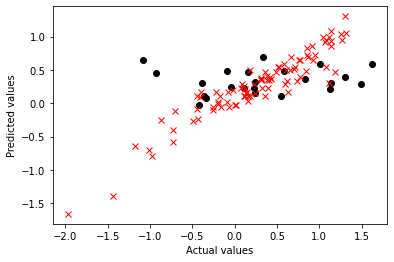

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_one_one_test, y_one_one_pred, 'o', color='black')
plt.plot(y_one_one_train,y_one_one_pred_tr, 'x', color='red')
plt.show()

In [24]:
from sklearn.metrics import r2_score
print('Training set:',r2_score(y_one_one_train,y_one_one_pred_tr))
print('Test set:',r2_score(y_one_one_test,y_one_one_pred))

Training set: 0.8399366736431256
Test set: -0.0030798987349287543


#### Group 2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_one_two_test, y_one_two_pred, 'o', color='black')
plt.plot(y_one_two_train,y_one_two_pred_tr, 'x', color='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('Training set:',r2_score(y_one_two_train,y_one_two_pred_tr))
print('Test set:',r2_score(y_one_two_test,y_one_two_pred))

### Cloud 2
#### Group 1

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_two_one_test, y_two_one_pred, 'o', color='black')
plt.plot(y_two_one_train,y_two_one_pred_tr, 'x', color='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('Training set:',r2_score(y_two_one_train,y_two_one_pred_tr))
print('Test set:',r2_score(y_two_one_test,y_two_one_pred))

#### Group 2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_two_two_test, y_two_two_pred, 'o', color='black')
plt.plot(y_two_two_train,y_two_two_pred_tr, 'x', color='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print('Training set:',r2_score(y_two_two_train,y_two_two_pred_tr))
print('Test set:',r2_score(y_two_two_test,y_two_two_pred))